<a href="https://colab.research.google.com/github/Abhi08ch/CodVeda-Technologies/blob/main/L3_Task_1_Build_a_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEVEL-3**

# **Task 1: Build a Random Forest Classifier**

In [29]:
import pandas as pd

# Load data
df = pd.read_csv("churn-bigml-80.csv")

# Convert 'Churn' to 0/1
df['Churn'] = df['Churn'].astype(int)

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Features and label
X = df.drop('Churn', axis=1)
y = df['Churn']


In [31]:
# Step 3: Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create and train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [32]:
# Step 4: Evaluate Performance
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred = rf.predict(X_test)

# Report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.96       456
           1       0.96      0.60      0.74        78

    accuracy                           0.94       534
   macro avg       0.95      0.80      0.85       534
weighted avg       0.94      0.94      0.93       534

Confusion Matrix:
 [[454   2]
 [ 31  47]]


In [33]:
# Step 5: Cross-Validation (Optional)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='f1')
print("Average F1 Score (5-fold):", scores.mean())


Average F1 Score (5-fold): 0.7108333003512433


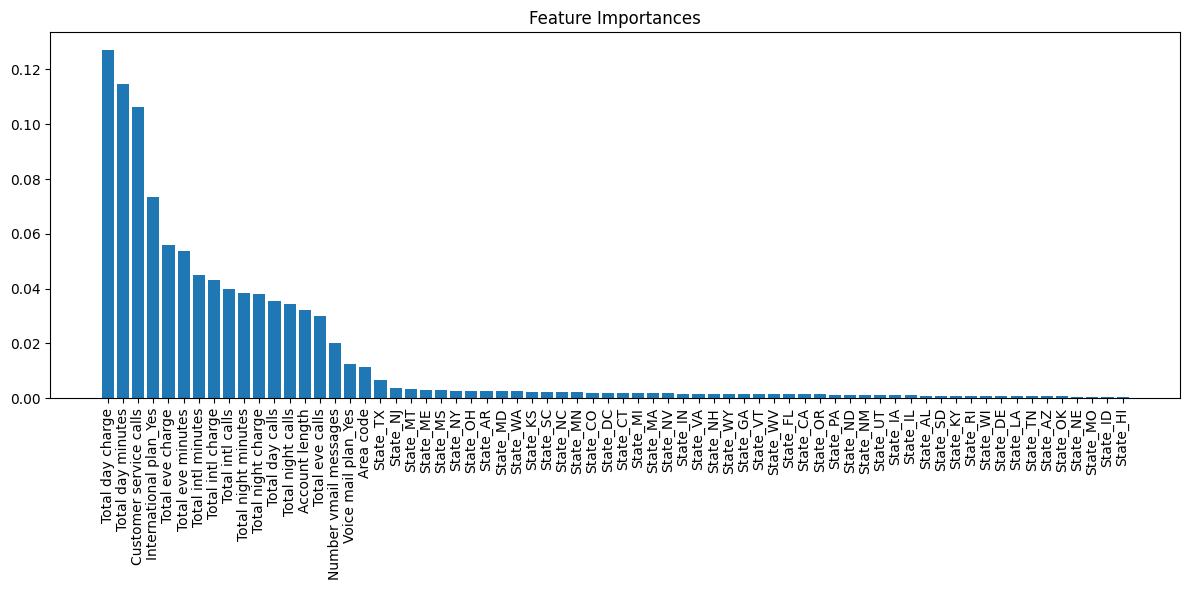

In [34]:
# Step 6: Feature Importance
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()
